In [30]:
import cv2
import dlib
import os
import matplotlib.pyplot as plt
import openface

In [39]:
detector = dlib.get_frontal_face_detector()
# Download at: http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor_model = "/Users/trananhvu/Documents/CV/CV_internship/model/shape_predictor_68_face_landmarks.dat"
face_pose_predictor = dlib.shape_predictor(predictor_model)
# pip install git+https://github.com/cmusatyalab/openface.git
face_aligner = openface.AlignDlib(predictor_model)

# Ví dụ preprocess ảnh

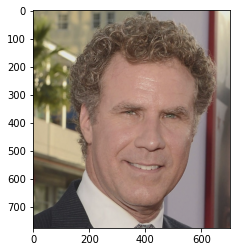

In [48]:
face_image = cv2.imread("/Users/trananhvu/Documents/CV/CV_internship/sample_image/image for alignment.png")
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
plt.imshow(face_image)

In [43]:
detected_faces = detector(face_image, 1)

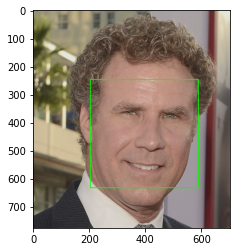

In [47]:
# change from (left, top, right, bottom) to (x, y, w, h)
def convert_and_trim_bb(image, rect):
	startX = rect.left()
	startY = rect.top()
	endX = rect.right()
	endY = rect.bottom()

	startX = max(0, startX)
	startY = max(0, startY)
	endX = min(endX, image.shape[1])
	endY = min(endY, image.shape[0])

	w = endX - startX
	h = endY - startY

	return (startX, startY, w, h)
boxes = [convert_and_trim_bb(face_image, r) for r in detected_faces]
bounding_box = face_image.copy()
for (x, y, w, h) in boxes:
	cv2.rectangle(bounding_box, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(bounding_box)

In [59]:
# Phát hiện face landmarks
pose_landmarks = face_pose_predictor(face_image, detected_faces[0])
print("Số lượng face landmark: "+str(pose_landmarks.num_parts))
print("Toạ độ các điểm face landmark: ")
print(pose_landmarks.parts())

Số lượng face landmark: 68
Toạ độ các điểm face landmark: 
points[(215, 366), (213, 421), (212, 476), (219, 529), (237, 578), (267, 621), (303, 659), (346, 689), (394, 699), (441, 691), (476, 658), (508, 620), (535, 579), (552, 534), (561, 487), (568, 442), (575, 395), (279, 354), (307, 337), (341, 333), (376, 339), (408, 352), (451, 359), (483, 352), (513, 348), (542, 355), (556, 377), (429, 376), (428, 410), (427, 443), (426, 477), (380, 490), (398, 497), (418, 505), (437, 501), (453, 496), (320, 367), (339, 358), (359, 359), (373, 375), (355, 375), (336, 374), (463, 383), (481, 371), (501, 371), (517, 384), (501, 388), (482, 387), (323, 542), (358, 543), (389, 545), (409, 551), (429, 548), (450, 552), (469, 558), (446, 578), (424, 585), (404, 585), (382, 582), (353, 569), (334, 545), (388, 552), (408, 557), (428, 555), (459, 559), (426, 570), (406, 573), (385, 568)]


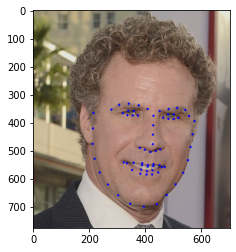

In [73]:
face_landmarks = face_image.copy()
for i in range(pose_landmarks.num_parts):
    cv2.circle(face_landmarks, (pose_landmarks.part(i).x,pose_landmarks.part(i).y), radius=4, color=(0, 0, 255), thickness=-1)
plt.imshow(face_landmarks)

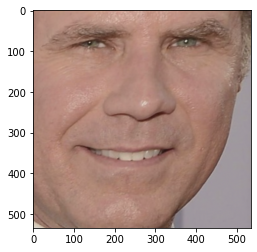

In [71]:
# Chỉnh sửa ảnh
alignedFace = face_aligner.align(534, face_image, detected_faces[0], landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
plt.imshow(alignedFace)

In [75]:
alignedFace=cv2.cvtColor(alignedFace, cv2.COLOR_BGR2RGB)
cv2.imwrite("/Users/trananhvu/Documents/CV/CV_internship/sample_image/preprocess_img.jpg", alignedFace)

True

# Lưu ảnh preprocess

In [34]:
# Ta sẽ xác định các khuôn mặt bằng HOG, chỉnh sửa ảnh khuôn mặt và lưu ảnh khuôn mặt đã chỉnh sửa
def preprocess(image_path, save_path, upsample):
    image = cv2.imread(image_path)
    rects = detector(image, upsample)
    if len(rects)==1:
        pose_landmarks = face_pose_predictor(image, rects[0])
        alignedFace = face_aligner.align(534, image, rects[0], landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
        cv2.imwrite(os.path.join(save_path, os.path.basename(image_path)), alignedFace)

In [35]:
# Path setting
source_path = "/Users/trananhvu/Documents/CV/data/sample"
save_parent_path = "/Users/trananhvu/Documents/CV/data/preprocess"

In [37]:
for i in os.listdir(source_path):
    if i==".DS_Store":
        continue
    print(i)
    image_source_path = os.path.join(source_path, i)
    for j in os.listdir(image_source_path):
        if j==".DS_Store":
            continue
        print("Image: "+j)
        if not os.path.exists(os.path.join(save_parent_path, i)):
            os.mkdir(os.path.join(save_parent_path, i))
        preprocess(os.path.join(image_source_path, j), os.path.join(save_parent_path, i), upsample=3)

Queen_Elizabeth_II
Image: Queen_Elizabeth_II_0009.jpg
Image: Queen_Elizabeth_II_0008.jpg
Image: Queen_Elizabeth_II_0012.jpg
Image: Queen_Elizabeth_II_0006.jpg
Image: Queen_Elizabeth_II_0007.jpg
Image: Queen_Elizabeth_II_0013.jpg
Image: Queen_Elizabeth_II_0005.jpg
Image: Queen_Elizabeth_II_0011.jpg
Image: Queen_Elizabeth_II_0010.jpg
Image: Queen_Elizabeth_II_0004.jpg
Image: Queen_Elizabeth_II_0001.jpg
Image: Queen_Elizabeth_II_0003.jpg
Image: Queen_Elizabeth_II_0002.jpg
Spencer_Abraham
Image: Spencer_Abraham_0009.jpg
Image: Spencer_Abraham_0008.jpg
Image: Spencer_Abraham_0014.jpg
Image: Spencer_Abraham_0001.jpg
Image: Spencer_Abraham_0015.jpg
Image: Spencer_Abraham_0003.jpg
Image: Spencer_Abraham_0017.jpg
Image: Spencer_Abraham_0016.jpg
Image: Spencer_Abraham_0002.jpg
Image: Spencer_Abraham_0006.jpg
Image: Spencer_Abraham_0012.jpg
Image: Spencer_Abraham_0013.jpg
Image: Spencer_Abraham_0007.jpg
Image: Spencer_Abraham_0011.jpg
Image: Spencer_Abraham_0005.jpg
Image: Spencer_Abraham_0004.jp